## matplotlib.pyplot.fill

#### matplotlib.pyplot.fill(*args, data=None, **kwargs)

Plot filled polygons.

#### Parameters:	
*args : sequence of x, y, [color]
Each polygon is defined by the lists of x and y positions of its nodes, optionally followed by a color specifier. See matplotlib.colors for supported color specifiers. The standard color cycle is used for polygons without a color specifier.

You can plot multiple polygons by providing multiple x, y, [color] groups.

For example, each of the following is legal:

1. ax.fill(x, y)                    # a polygon with default color
2. ax.fill(x, y, "b")               # a blue polygon
3. ax.fill(x, y, x2, y2)            # two polygons
4. ax.fill(x, y, "b", x2, y2, "r")  # a blue and a red polygon

data : indexable object, optional
An object with labelled data. If given, provide the label names to plot in x and y, e.g.:

ax.fill("time", "signal", data={"time": [0, 1, 2], "signal": [0, 1, 0]})

#### Returns:	
a list of Polygon
#### Other Parameters:	
**kwargs : Polygon properties

### Filled polygon

fill() draws a filled polygon based on lists of point coordinates x, y.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

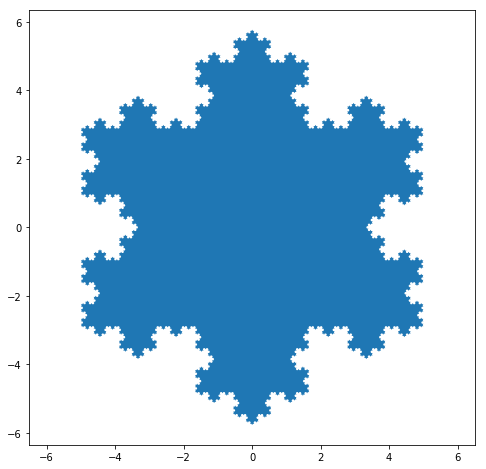

In [2]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

Use keyword arguments facecolor and edgecolor to modify the the colors of the polygon. Since the linewidth of the edge is 0 in the default Matplotlib style, we have to set it as well for the edge to become visible.

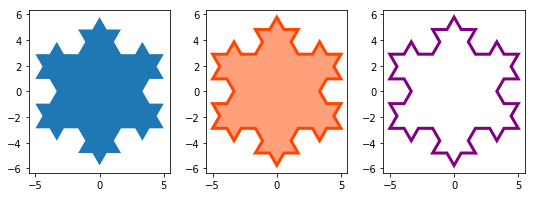

In [3]:
x, y = koch_snowflake(order=2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3),
                                    subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)

plt.show()

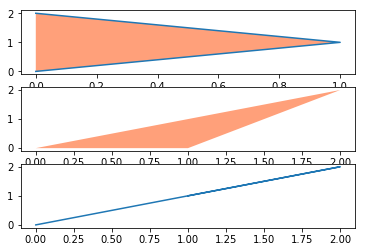

In [43]:
fig, ax = plt.subplots(3,1)
ax[0].plot("time", "signal", data={"time": [0, 1, 0], "signal": [0, 1, 2]})
ax[0].fill("time", "signal", data={"time": [0, 1, 0], "signal": [0, 1, 2]}, facecolor='lightsalmon' )
ax[1].fill("time", "signal", data={"time": [0, 2, 1], "signal": [0, 2, 0]}, facecolor='lightsalmon' )
ax[2].fill("time", "signal", data={"time": [0, 2, 1], "signal": [0, 2, 1]}, facecolor='lightsalmon' )
ax[2].plot("time", "signal", data={"time": [0, 2, 1], "signal": [0, 2, 1]})
plt.show()

### Fill Spiral

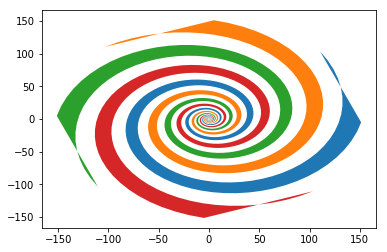

In [25]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.arange(0, 8*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)

plt.show()